# TELECOM CHURN - WHAT'S THE HANG UP?

![frustrated_caller](images/frustrated_caller.jpg)

## Business Case
Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

## Road Map (to Perdition)

### [Data Understanding](#data_understanding)
For this project, we are utilizing data from SyriaTel, made available on [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/), a popular data science hub.

### [Data Preparation](#data_preparation)

### [Modeling](#modeling)

### [Evaluation](#evaluation)

### [Iteration](#iteration)

### [Conclusion](#conclusion)

## Data Understanding <a id='data_understanding'></a>
For this project, we are utilizing data from SyriaTel, made available on [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/), a popular data science hub. 

To get started, we're going to import our standard collection of relevant items.

In [84]:
#import python libraries for data visualizations, dataframes, and statistical capabiilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

#import scikit modules for machine learning techniques
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE, ADASYN

### Obtaining Data
The data itself is a CSV file, so we can use some of our standard import methods to 

In [3]:
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Inspection
Let's do some high level inspection. We're going to look at our target variable distribution.

#### Target Variable Distribution
How many customers are "churning". True means they've left. False means they're still a customer.

In [4]:
#obtain total count of target variables
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
target = df['churn']
features = df.drop('churn', axis = 1)

#### Features Type
What are our features type? We'll need to convert these to numerical at some point

In [6]:
#find the type counts for your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Numeric Feature Statistics

In [7]:
#let's see some high level description of our data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#we'll inspect the counts of each state
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

#### Summary
A few high level summary items. We discover that we have 20 columns of features and 1 column of targets. Our target is Boolean - (True/False), so this confirms the nature of our analysis as binary classification. 

There are 3333 total entries. Of our feature columns, 4 are objects. Of these 4 columns, they all feel relevant for our case, except for phone number. The other columns are floats or ints so we can process that appropriately. Additionally, we see that `'area code'` is an `int`. We know that area codes are really a description of a region, much like the `'state'` column, so we should probably treat that like a categorical. Our review of the states column shows that we have siginificant accounts from every state.

In [8]:
print(f'There a total of {len(target)} entries.')
class_imbalance = " "
churn_percentage = len(df[target == True])/len(target)
if churn_percentage > .2:
    class_imbalance = " not "
print(f'The percentage of users who churn is {churn_percentage :.2%}.')
print(f'We do{class_imbalance}have class imbalance concerns.')
print(f'So... our model should have a higher accuracy than {(1 - churn_percentage) :.2%} at predicting who will stay.')


There a total of 3333 entries.
The percentage of users who churn is 14.49%.
We do have class imbalance concerns.
So... our model should have a higher accuracy than 85.51% at predicting who will stay.


### Data Preparation <a id='data_preparation'></a>

Before we begin the modeling, we have to make sure our data is cleaned and ready for processing. So, to do this, we're going to drop the phone numbers, one hot encode our categorical data, and convert our boolean category to integers (0,1). We previously observed that we have no null values, so we don't have to fill any in.

#### Drop  Phone Numbers
From our domain knowledge, we know that the last seven digits of a phone number are unique and assigned randomly. We don't want these numbers considered so we're going to drop them from our data set.

In [9]:
X = features.drop('phone number', axis = 1)
X

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


#### One Hot Encoding
Now that we've dropped our phone number category, it's we can one hot encode our two remaning columns, which are `'state'`, `'area code'`, as well as `'international plan'` and `'voice mail plan'`. We can also convert our target column to 1/0 as well. To simplify, we'll do a binary converstion on `'international plan'` and `'voice mail plan'` to convert to 1/0 .

In [10]:
#we'll use a mapping function to convert the yes/nos to 1/0s
d = {'no': 0, 'yes': 1}
X['international plan'] = X['international plan'].map(d).fillna(X['voice mail plan'])
X['voice mail plan'] = X['voice mail plan'].map(d).fillna(X['voice mail plan'])

In [11]:
#we'll use getdummies function to do one hot encoding for the 'state' and 'area code'
X_ohe = pd.get_dummies(X)
X_ohe = pd.get_dummies(X_ohe, columns = ['area code'])
#we'll remerge these matrices.
#X_ohe = X.drop(['state','area code'],axis=1)
X_ohe

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,1,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


Great, so we've expanded our now let's convert the target from yes/no to 1/0.

In [12]:
#we'll use the .astype function to convert boolean to the integer
target.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

#### Summary
We've now performed the one hot encoding for our categorical data, as well as removed the phone numbers from our data. We've also converted our target to 0,1s, so we should be ready to perform our train-test split, transform the data, and begin training our model.

### Modeling <a id='modeling'></a>

Now that we have cleaned our data, we can being to prepare it for preprocessing, transformation, and eventually modeling. We noted early that we have roughly 85% of our users who stay on our cellular plan, so we should account for the class imbalance here.

#### Train-Test Split and Scaling
To start, let's perform our train-test split and scaling.  

In [13]:
#perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, target, random_state=42, test_size = .25)

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

Perfect, now, to inspect the split I'll convert into a dataframe.

In [14]:
# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns = X_ohe.columns)
scaled_df_train

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,-1.404508,-0.327448,-0.611418,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111
1,0.366388,-0.327448,-0.611418,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111
2,0.518179,-0.327448,1.635543,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,1.707902,-0.998800,-0.570111
3,2.010792,-0.327448,-0.611418,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111
4,0.290493,-0.327448,-0.611418,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,-0.998800,1.754044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.138701,-0.327448,-0.611418,-0.584700,1.746540,0.980114,1.746707,-0.044882,-0.894137,-0.045169,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,-0.998800,1.754044
2495,0.543478,-0.327448,-0.611418,-0.584700,-2.681141,-1.926002,-2.680873,-0.396533,-0.545355,-0.396122,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111
2496,-0.873239,-0.327448,-0.611418,-0.584700,-1.709753,-1.224526,-1.710027,1.207625,0.550818,1.207571,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,1.707902,-0.998800,-0.570111
2497,1.732508,-0.327448,-0.611418,-0.584700,-0.014911,0.529165,-0.015400,-0.507164,1.497512,-0.507683,...,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.585514,1.001201,-0.570111


Perfect, so, we have our scaled data set now. We can begin a various modeling techniques. We will compare various techniques, KNN, Logisitic Regression and Decision Tree and then make a decision from those base models on which to proceed.

#### KNN
We'll set up a baseline KNN classifier with no pyrameters tuning to see what we get.

In [15]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the classifier
knn_clf.fit(scaled_data_train, y_train)

# Predict on the test set
train_preds = knn_clf.predict(scaled_data_train)

Now we have our model, let's see the results. We're going to use a variety of metrics here.

In [16]:
# import the evlaution metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# create a 
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, train_preds)

Precision Score: 0.9
Recall Score: 0.17597765363128492
Accuracy Score: 0.8791516606642658
F1 Score: 0.29439252336448596


Precision score of 0.9 isn't bad, and the accuracy score has improved. We used the default K in this case of 5. Let's see if we can find the best K possible. To do this, we'll create a function find the optimal K value.

In [17]:
def find_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        acc = accuracy_score(y_test, preds)
        if acc > best_score:
            best_k = k
            best_score = acc
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy-Score: {}".format(best_score))
    
find_k(scaled_data_train, y_train, scaled_data_train, y_train)

Best Value for k: 1
Accuracy-Score: 1.0


Whoa! These results seem... off. It saying our best value for K is to test 1 neighbor and our Accuracy score is perfect.

Maybe we got lucky with our split. Let's rerun this model but this time we will score with Cross validation.

In [18]:
def find_k_cross(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn_clf_cross = KNeighborsClassifier(n_neighbors=k)
        dt_cv_score = cross_val_score(knn_clf_cross, X_train, y_train, cv=5)
        acc = np.mean(dt_cv_score)
        if acc > best_score:
            best_k = k
            best_score = acc
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy-Score: {}".format(best_score))

find_k_cross(scaled_data_train, y_train, scaled_data_train, y_train)

Best Value for k: 7
Accuracy-Score: 0.8591430861723446


Okay... this look more reasonable. Our optimal K value was 7 and our Accuracy was 85.9%. So, we slightly improved over our baseline, but not really. Let's try something else.

#### Logistic Regression
Now let's try a logistic regression. To perform this, we're going to scale our model differently. Previously, we used a standard scaler with KNN. However, now with the Logistic Regression, we must used the MinMaxScaler to avoid negative numbers.

Let's go ahead and transform the data and then rerun it.

In [19]:
# Instantiate StandardScaler
mmscaler = MinMaxScaler()

# Transform the training and test sets
mmscaled_data_train = mmscaler.fit_transform(X_train)
mmscaled_data_test = mmscaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

logireg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logireg.fit(mmscaled_data_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [21]:
train_preds = model_log.predict(mmscaled_data_train)

In [22]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, train_preds)

Precision Score: 0.6333333333333333
Recall Score: 0.26536312849162014
Accuracy Score: 0.8727490996398559
F1 Score: 0.37401574803149606


Okay, so... at quick glance we did improve slightly on the Accuracy Score. Again, it's nothing... amazing. 
Perhaps we can iterate over a few options and find a good C, as well as a solver.

This time, instead of a custom optimizer, I'm going to use the GridSearchCV option. 

In [23]:
logi_grid_clf = LogisticRegression(fit_intercept=False)

param_grid = {
    'C': [1e1, 1e5, 1e7, 1e10, 1e12, 1e15, 1e20],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [10, 50, 100, 250, 500]
}

gs_logi = GridSearchCV(logi_grid_clf, param_grid, cv=5)
gs_logi.fit(mmscaled_data_train, y_train)

gs_logi.best_params_

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklear

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sk

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

{'C': 10.0, 'max_iter': 10, 'solver': 'sag'}

Okay, let's check our accuracy here. I'm going to run the logistic regression, again with the new numbers.

In [24]:
logireg = LogisticRegression(fit_intercept=False, C=1e10, solver='sag', max_iter = 10)
model_log = logireg.fit(mmscaled_data_train, y_train)
train_preds = model_log.predict(mmscaled_data_train)
print_metrics(y_train, train_preds)

Precision Score: 0.6296296296296297
Recall Score: 0.2849162011173184
Accuracy Score: 0.8735494197679071
F1 Score: 0.3923076923076923


C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Right, so only a marginal increase in accuracy and F1 score. Nothing to write home about. Let's move to a decision tree.

#### Decision Tree
With decision tree, we're going to try without scaling and see what happens. We have our original training data so we can just use that. Additionally, we're going to add a cross validation score at the end to make sure our accuracy is okay, and to account for any overfitting that would naturally occur with a Decision tree.

In [25]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
train_preds = dt_clf.predict(X_train)

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=50)
mean_dt_cv_score = np.mean(dt_cv_score)

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, train_preds)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0
Mean Cross Validation Score: 91.48%


Whoa! We got a perfect score on our decision tree, with a mean cross validation accuracy of 91.48%. This looks promising. So  far this is our best results. We should probably continue down this path. Let's run a quick Grid CV and see what we can do with the current model and dataset. We can update a few of the hyper parameters and see if this improves.

In [26]:
dt_grid_clf = DecisionTreeClassifier()

dt_param_grid = {"criterion": ("gini", "entropy"), 
                 "max_depth": ["None", 2,3,4,5,6], 
                 "min_samples_split": [2,5,10], 
                 "min_samples_leaf": [1,2,3,4,5,6]}

gs_dt_grid = GridSearchCV(dt_grid_clf, dt_param_grid, cv=5)
gs_dt_grid.fit(X_train, y_train)

gs_dt_grid.best_params_

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Okay, so we've run into "a few" warnings. Let's take these results and run a new Decision Tree to see what we've got.

In [27]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 5)
dt_clf.fit(X_train, y_train)
train_preds = dt_clf.predict(X_train)

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=50)
mean_dt_cv_score = np.mean(dt_cv_score)

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, train_preds)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Precision Score: 0.9710144927536232
Recall Score: 0.7486033519553073
Accuracy Score: 0.9607843137254902
F1 Score: 0.8454258675078865
Mean Cross Validation Score: 93.72%


Okay, this is promising. We have really strong scores here. Precision, Recall, and F1 are up across the board. 
The Decision tree appears to be the best "base" model, before any boosting. Let's take a look at what features are prominent and re-examine the data from here.

### Evaluation <a id='evaluation'></a>
Now we have done some baseline modeling, we seemed to have settled on a Decision Tree approach which gives us some of best preliminary results. It's a good time to see what we have an tweak the model from there.

#### Sample and Data
As we noted in our original assessment, there are class imbalance concerns because we only have a churn rate of about 15%. We created our original train/test split and have been careful since then to use cross-validation to mitigate an overfitting, we could be missing something with a relatively small sample size to work with. One way to mitigate that would be using a SMOTE technique to create a new population for a train-test split, and then rerun our decision tree from there.

#### Modeling Techniques
We used three different modeling techniques to train on our data: KNN, Logistic Regression, and Decision Tree. With KNN and Logistic Regression, we only achieved small bumps in accuracy and F1. The Decision Tree with some hyperparamater tuning yielded more favorable results. Going forward, we'll use a Decision Tree on this data. The advantage with the Decision tree is we don't have to utilize much scaling and we can optimize later with Random Forests or other boosting.

#### Features
So, we like our model, but how do we explain it. What features really drive the success of the model. To answer that question, let's review the feature importance and see what comes out.

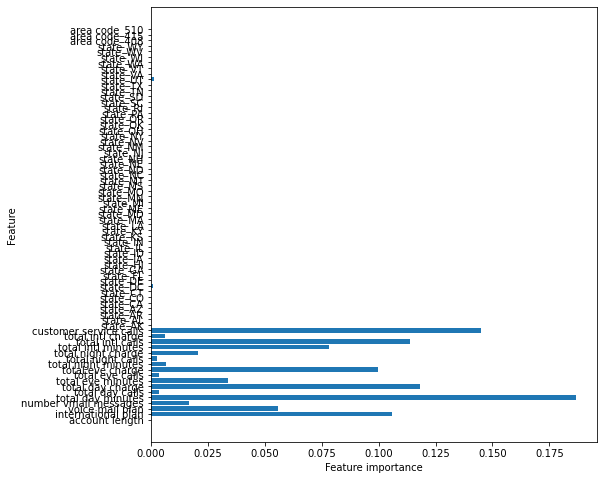

In [28]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt_clf)

Perfect. This graph tells us our important features. From here we can see that Total Day Calls features most prominently but not far in front of the next feature, which is customer service calls. Thinking about these factors make sense intuitively, those people who talk on the phone a lot may have higher bills, and the most likely to quit. But... we don't have a feature for total charge. We have different categories of evening, daytime, and international charge, but no total.

Also, those who most call customer service a lot are probably disappointed with their service.

Also, of note, there's is little if any importance attached to the state, as well as the area code. It could be useful to delete these variables going forward in order to speed up processing time. And refocus the training of the models.

#### Summary
We reviewed the modeling techniques and well, we're moving on. We had the best preliminary results with the Decision Tree, so we will continue to utilize that model, and perhaps boost it later.

We're going to remove the state and Area Code features all together. We're going to create new feature which shows us the total charge, and perhaps convert the international call to a charge per minute number. We're going to remove the state and area code features all together, as they seem to have little effect.

Sampling - We're going to utilize the SMOTE technique on our data and train on models on that. This should increase our accuracy and limit and issues related to class imbalance.

So... let's give it a shot.

### Iteration <a id='iteration'></a>
Now that we've taken a first crack at the modeling, we need to adjust some things. We're going to do some feature engineering, some resampling, and then we will rerun our Decision Tree model, with some Random Forest modeling later.

#### Features
Features. As we mentioned previously, we're going to do a little feature engineering. We may even violate some collinearity guidelines in the process. Who knows!

So, we're going to rexamine our original dataset, and remove state and area code altogether. Additionally, we're going to create a column called total charge. While we're at it, let's modify the evening charge to be a cost per to determine the average cost/minute to see if we can see anything there.

In [78]:
#pull up df again
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [79]:
#let's separate our target to avoid date leakage
y_iter = df['churn']

#let's create our features set and drop out the phone number, like we did previously, but also the state and area code.
X_iter = df.drop(columns = ['area code', 'phone number', 'state', 'churn'], axis = 1)
X_iter

#let's convert the yes/nos of the various plans to 1/0s, just as we did previously.
d = {'no': 0, 'yes': 1}
X_iter['international plan'] = X_iter['international plan'].map(d).fillna(X_iter['voice mail plan'])
X_iter['voice mail plan'] = X_iter['voice mail plan'].map(d).fillna(X_iter['voice mail plan'])
X_iter.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [80]:
#we're going to create a new column, total charge, as well as three new columns for average charge/min.
X_iter['total charge'] = X_iter['total day charge'] + X_iter['total eve charge'] + X_iter['total night charge'] + X_iter['total intl charge']
X_iter

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,75.56
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,59.24
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,62.29
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,66.80
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,60.10
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,63.53
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,67.74
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,57.53


In [81]:
X_iter.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis = 1, inplace = True)
X_iter.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total charge
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,75.56
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,59.24
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,62.29
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,66.80
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,52.09


In [87]:
y_iter.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

Fantastic! It looks like we cleaned up this data... for now. A couple of takeaways, because the charges are a flat rate, it turns out the minutes and charges for each pricing tier are collinear. By combining the charges into one total charge, we've streamlined our data, solved potential collinearity issues, and have a more "customer-focused" column.

#### SMOTE 

We're going to SMOTE this one! Okay, it's time to resample. We know our churn rate is only 15%. So let create a more even sample size and then we will apply the Decision Tree.

In [89]:
#create a new data set
X_resampled, y_resampled = SMOTE().fit_sample(X_iter, y_iter)

# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

# observe split between 
y_train.value_counts()

In [90]:
y_train.value_counts()

False    2147
True     2128
Name: churn, dtype: int64

Aha! This looks good. We have a 50-50 split, and 4,000 pieces of data to dig into as opposed to just... 3300, and it's streamlined.

#### Decision Tree with CVGrid.

Now that we have a more complete model, it's a good opportunity to rerun a decision tree with a CV grid and scope out the goods.

In [91]:
dt_iter_grid = DecisionTreeClassifier()

dt_param_grid = {"criterion": ("gini", "entropy"), 
                 "max_depth": ["None", 2,3,4,5,6], 
                 "min_samples_split": [2,5,10], 
                 "min_samples_leaf": [1,2,3,4,5,6]}

gs_iter_grid = GridSearchCV(dt_iter_grid, dt_param_grid, cv=5)
gs_iter_grid.fit(X_train, y_train)

gs_iter_grid.best_params_

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 276, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Okay, these results are similar to the ones we had previously. Except we used 'gini' before.

In [92]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 2, min_samples_split = 5)
dt_clf.fit(X_train, y_train)
train_preds = dt_clf.predict(X_train)

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=50)
mean_dt_cv_score = np.mean(dt_cv_score)

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, train_preds)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Precision Score: 0.9975216852540273
Recall Score: 0.756578947368421
Accuracy Score: 0.8778947368421053
F1 Score: 0.8605024051309459
Mean Cross Validation Score: 87.59%


This is very strong. Recall that, with our new SMOTE data, we had a roughly 50-50 chance of predicting churn. We achieved a precision score of nearly 100%, with an accuracy score of 37% higher than 50%. This is a strong performance. Let's try this out on the test data.